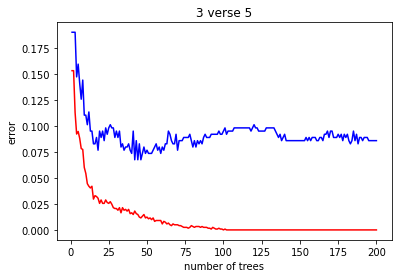

In [47]:
#!/usr/bin/python3
# Homework 5 Code
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
def adaboost_trees(X_train, y_train, X_test, y_test, n_trees):
    # %AdaBoost: Implement AdaBoost using decision trees
    # %   using information gain as the weak learners.
    # %   X_train: Training set
    # %   y_train: Training set labels
    # %   X_test: Testing set
    # %   y_test: Testing set labels
    # %   n_trees: The number of trees to use
    N=len(X_train)
    M =len(X_test)
    d = np.ones(N)/N
    output_train=np.zeros((N,n_trees))
    output_test=np.zeros((M,n_trees))
    alpha=np.zeros(n_trees)
    train_error=np.zeros(n_trees)
    test_error=np.zeros(n_trees)
    #train the next weak learner based on the dataset that is classified wrong in the previous weak learner.
    for i in range(n_trees):
        clf=DecisionTreeClassifier(criterion="entropy",max_depth = 1)
        clf.fit(X_train,y_train,sample_weight=d)
        output_train[:,i]= clf.predict(X_train)
        output_test[:,i]=clf.predict(X_test)
        epsilon=np.sum(d*(output_train[:,i]!=y_train))
#         print(epsilon)
        alpha[i]=0.5*np.log((1-epsilon)/epsilon)
        d=d*np.exp(-alpha[i]*output_train[:,i]*y_train)
        d=d/(np.sum(d))
        predic_train = np.sign(np.matmul(output_train[:,:i+1],alpha[:i+1]))
        predic_test=np.sign(np.matmul(output_test[:,:i+1],alpha[:i+1]))
        train_error[i] =np.sum(predic_train!=y_train)/N
        test_error[i] =np.sum(predic_test!=y_test)/M
    plt.title('3 verse 5')
    plt.xlabel('number of trees')
    plt.ylabel('error')
    plt.plot(np.arange(1,201),train_error, 'r')
    plt.plot(np.arange(1,201),test_error,'b')
    return train_error, test_error

def main_hw5():
    # Load data
    og_train= np.genfromtxt('zip.train')
    og_test= np.genfromtxt('zip.test')
    # Split data
    y_train=[]
    list1=np.where(og_train[:,0]==1)[0].tolist()
    list3=np.where(og_train[:,0]==3)[0].tolist()
    list5=np.where(og_train[:,0]==5)[0].tolist()
    X_train1 = og_train[list1+list3,:]
    X_train2=og_train[list3+list5,:]
#     print(X_train.shape)
    for i in range(len(X_train2)):
        if X_train2[i,0]==3:
            y_train.append(1)
        else:
            y_train.append(-1)
    X_train2=X_train2[:,1:]
#     print(X_train.head)
#     print(y_train)
    tlist1=np.where(og_test[:,0]==1)[0].tolist()
    tlist3=np.where(og_test[:,0]==3)[0].tolist()
    tlist5=np.where(og_test[:,0]==5)[0].tolist()
    X_test1 =og_test[tlist1+tlist3,:]
    X_test2=og_test[tlist3+tlist5,:]
    y_test=[]
    for i in range(len(X_test2)):
        if X_test2[i,0]==3:
            y_test.append(1)
        else:
            y_test.append(-1)
    X_test2=X_test2[:,1:]
    train_error, test_error = adaboost_trees(X_train2, y_train, X_test2, y_test, 200)
#     print(train_error,test_error)


if __name__ == "__main__":
    main_hw5()